In [1]:
import numpy as numpy
import matplotlib.pyplot as plt

from random import randint as rand

In [2]:
ALPHABET = [car for car in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"]
ALPHABET_LEN = len(ALPHABET)
SHORTER_LINKS   = [(rand(0,ALPHABET_LEN-1), rand(0,ALPHABET_LEN-1)) for i in range(int(ALPHABET_LEN*ALPHABET_LEN/2))]
SHORTER_HEADER  = ["http://link%s.com" % (car) for car in ALPHABET]
SHOTRTER_MATRIX = numpy.zeros((ALPHABET_LEN, ALPHABET_LEN), dtype=numpy.float64)

for i in range(ALPHABET_LEN): SHOTRTER_MATRIX[i][i] = True
for x,y in SHORTER_LINKS: SHOTRTER_MATRIX[x][y] = 1
    
for x in range(ALPHABET_LEN):
    for y in range(x,ALPHABET_LEN):
        SHOTRTER_MATRIX[y][x] = SHOTRTER_MATRIX[x][y]

In [3]:
print('\n'.join(' '.join(str(cell) for cell in row) for row in SHOTRTER_MATRIX))

1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0
0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 1.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 0.0
0.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0
1.0 0.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 1.0
1.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0
1.0 0.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0
0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 1.0 0.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0
1.0 1.0 1.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0
0.0 0.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0 0.0 1.0 0.0 1.0 1.0
0.0 0.0 1.0 0.0 0.0 1.0 1.0 1.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 

In [4]:
def to_stoquastic_row(x):
    s = numpy.sum(x) / 100
    return numpy.array(map(lambda x : 1.0 if x == 0.0 else s, x))

In [5]:
SHOTRTER_MATRIX = numpy.apply_along_axis(lambda x: to_stoquastic_row(x), 1, SHOTRTER_MATRIX) 
## to stoquastic matrix

In [6]:
WEIGHTS = numpy.full(ALPHABET_LEN, 1.0, dtype=numpy.float64)
WEIGHTS

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
class plot_builder():
    def __init__(self):
        self.Xx = [[] for i in range(ALPHABET_LEN)]
        self.y  = []
        
    def append(self, X, y):
        self.y.append(y)
        for i,x in enumerate(X):
            self.Xx[i].append(x)
            
    def draw_plot(self):
        for x in self.Xx:
            plt.plot(x, self.y, 'r', linewidth=0.5)
        plt.title("Search algorithm")
        plt.ylabel("values of weights")
        plt.xlabel("iterations")
        plt.show()

In [8]:
def yiedling(X, w):
    
    iteration = -1
    tmp = None
    while iteration < 4500 and not numpy.array_equal(tmp, w):
        tmp = numpy.array(w)
        w = numpy.dot(w,X)
        iteration += 1
        print(iteration, w)
        yield iteration, w

(0, array([14.46, 16.28, 13.62, 17.15, 16.29, 11.87, 15.36, 17.2 , 15.43,
       17.2 , 15.4 , 18.12, 18.92, 21.55, 15.29, 17.25, 16.28, 18.07,
       13.57, 16.33, 15.39, 20.68, 12.83, 13.65, 14.47, 18.96]))
(1, array([234.9791, 268.517 , 225.2371, 280.989 , 269.3617, 199.3213,
       250.8649, 285.6545, 257.3229, 285.4304, 254.8559, 302.9845,
       309.3718, 348.9097, 243.9781, 290.2298, 268.0138, 298.4322,
       220.8199, 272.9409, 253.9022, 336.4063, 220.5122, 228.5546,
       236.2641, 312.9889]))
(2, array([3886.762743, 4424.47159 , 3703.890533, 4633.053851, 4449.775659,
       3270.925676, 4129.556737, 4707.607927, 4225.762479, 4704.057293,
       4207.180583, 4985.797309, 5112.90661 , 5774.009852, 4041.408855,
       4778.399279, 4411.899918, 4921.212267, 3648.619606, 4489.158344,
       4183.787475, 5569.146092, 3624.203223, 3759.90831 , 3899.858357,
       5173.359296]))
(3, array([64030.30008209, 72975.13738057, 61128.83316987, 76390.01827907,
       73358.91175063, 53982.

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:1910: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


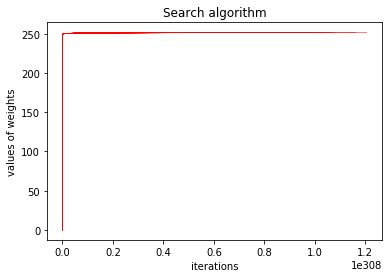

In [9]:
p = plot_builder()
for iteration, w in yiedling(SHOTRTER_MATRIX, WEIGHTS):
    p.append(w, iteration)
    
p.draw_plot()